## Support Vector Machine ~ Classification Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Data Collection & Analysis

In [2]:
data = pd.read_csv('C:/Users/HP/Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

### Data Analysis

In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
# Splitting the features and target 
X= data.iloc[:, [2,3]]
Y= data.iloc[:, 4]

In [9]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [10]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [11]:
# Spliting the dataset into training and testing set
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25, random_state=0)

In [12]:
X_train.shape

(300, 2)

In [13]:
X_test.shape

(100, 2)

In [14]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Applying Support Vector Machine

In [15]:
# Kernel used Linear
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train,Y_train)

# Predicitng the test result
Y_Pred = classifier.predict(X_test)

In [16]:
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [17]:
print('Accuracy Score: ',accuracy_score(Y_test, Y_Pred))

Accuracy Score:  0.9


In [18]:
# Kernel used radial basis function(rbf)
classifier = SVC(kernel= 'rbf')
classifier.fit(X_train,Y_train)

# Predicitng the test result
Y_Pred = classifier.predict(X_test)

In [19]:
print('Accuracy Score with default rbf kernel: ',accuracy_score(Y_test, Y_Pred))

Accuracy Score with default rbf kernel:  0.93


In [20]:
# Kernel used radial basis function(rbf) with gamma and C value  
classifier = SVC(kernel= 'rbf', gamma = 15, C= 7, random_state=0)
classifier.fit(X_train,Y_train)

# Predicitng the test result
Y_Pred = classifier.predict(X_test)

In [21]:
print('Accuracy Score with default rbf kernel(gamma=15,C=7): ',accuracy_score(Y_test, Y_Pred))

Accuracy Score with default rbf kernel(gamma=15,C=7):  0.89


In [22]:
# Kernel used Polynomial
classifier = SVC(kernel='poly',degree=4)
classifier.fit(X_train,Y_train)

# Predicitng the test result
Y_Pred = classifier.predict(X_test)

In [23]:
print('Accuracy Score with Polynomial kernel: ',+accuracy_score(Y_test, Y_Pred))

Accuracy Score with Polynomial kernel:  0.79


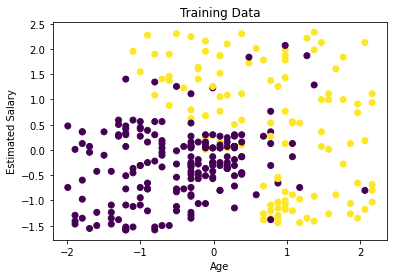

In [24]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

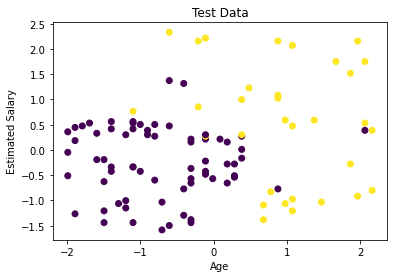

In [25]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Data')
plt.show()

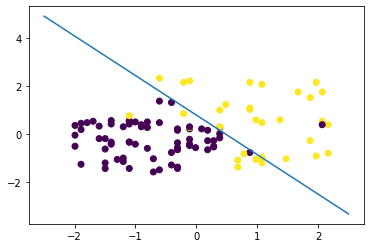

In [26]:
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train, Y_train)

# Predicting the test set results
Y_Pred = classifier.predict(X_test)

# Plot the data points
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)
    
# create the hyperplane
w= classifier.coef_[0]
a= -w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy= a* xx - (classifier.intercept_[0])/w[1]

# Plot the hyperlane
plt.plot(xx,yy)
plt.show();